# Problema del agente viajero

![](https://upload.wikimedia.org/wikipedia/commons/thumb/1/11/GLPK_solution_of_a_travelling_salesman_problem.svg/480px-GLPK_solution_of_a_travelling_salesman_problem.svg.png)


In [1]:
import random
from deap import algorithms, base, creator, tools
import numpy as np

In [2]:
# El número de ciudades
N_CITIES = 20

# Crear las clases FitnessMin y Individual
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

toolbox = base.Toolbox()

# Registro de atributos (en este caso, las ciudades)
toolbox.register("indices", random.sample, range(N_CITIES), N_CITIES)

# Inicialización de las estructuras
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.indices)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)


In [3]:
# Definir la función de evaluación
def evalTSP(individual):
    # Distancia entre la primera y última ciudad
    distance = ((CITIES[individual[-1]][0] - CITIES[individual[0]][0])**2 +
                (CITIES[individual[-1]][1] - CITIES[individual[0]][1])**2)**0.5
    # Distancias entre el resto de las ciudades
    for gene1, gene2 in zip(individual[0:-1], individual[1:]):
        distance += ((CITIES[gene1][0] - CITIES[gene2][0])**2 +
                     (CITIES[gene1][1] - CITIES[gene2][1])**2)**0.5
    return distance,


In [4]:
# Registrar las operaciones genéticas
toolbox.register("mate", tools.cxPartialyMatched)
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.05)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("evaluate", evalTSP)

In [5]:
def main():
    random.seed(42)

    # Generar las coordenadas de las ciudades
    global CITIES
    CITIES = [random.sample(range(100), 2) for _ in range(N_CITIES)]

    pop = toolbox.population(n=300)
    hof = tools.HallOfFame(1)
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("min", np.min)
    stats.register("max", np.max)
    
    algorithms.eaSimple(pop, toolbox, 0.7, 0.2, 40, stats=stats, 
                        halloffame=hof, verbose=True)
    
    return pop, stats, hof

In [6]:
pop, stats, hof = main()
print(f'Mejor individuo: {hof[0]} con una distancia de: {hof[0].fitness.values[0]}')

gen	nevals	avg   	min    	max    
0  	300   	1151.9	872.573	1390.25
1  	214   	1094.53	801.091	1348.91
2  	250   	1070.99	801.091	1310.45
3  	240   	1049.89	801.091	1353.64
4  	239   	1029.78	739.44 	1386   
5  	221   	1016.23	739.44 	1325.41
6  	215   	1002.02	772.333	1334.01
7  	229   	987.213	772.333	1279.71
8  	217   	979.423	749.836	1338.48
9  	205   	947.965	747.738	1331.19
10 	223   	915.426	696.1  	1218.97
11 	231   	883.617	668.62 	1286.25
12 	211   	848.203	668.62 	1173.04
13 	231   	826.759	668.62 	1177.54
14 	231   	808.351	668.62 	1199.61
15 	241   	791.993	652.404	1126.24
16 	238   	763.964	637.829	1257.04
17 	233   	745.985	609.555	1116   
18 	222   	720.664	609.555	1033.95
19 	225   	707.182	609.555	1079.78
20 	209   	694.793	609.555	1185.52
21 	232   	679.341	609.555	972.704
22 	237   	666.523	609.555	970.658
23 	217   	656.198	600.573	1139.66
24 	227   	640.168	600.573	1044.14
25 	246   	635.091	580.429	1092.65
26 	233   	624.663	580.429	1051.44
27 	219   	627.58 	571

In [9]:
import matplotlib.pyplot as plt

def plot_tsp(cities, individual):
    # Crear una nueva figura
    plt.figure()
    
    # Dibujar las ciudades como puntos
    plt.scatter(*zip(*cities), marker='o')
    
    # Dibujar el camino más corto como líneas entre puntos
    route = individual + [individual[0]]
    for i in range(len(route)-1):
        plt.plot([cities[route[i]][0], cities[route[i+1]][0]], 
                 [cities[route[i]][1], cities[route[i+1]][1]], 'r-')
    
    # Mostrar la figura
    plt.show()



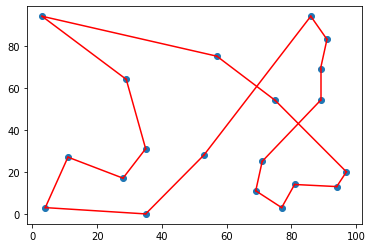

In [11]:
# Ejecutar la función de trazado para nuestro mejor individuo
plot_tsp(CITIES, hof[0])

## Ejercicio:

- Probar con otros parámetros del algoritmo genéticos.
- Usar otro número de ciudades.


## Práctica final:

- Codificar el un problema de optimización cualquiera y usar una de las estrategias evolutivas vista en el curso.

- La notebook debe estar bien explcada.